### 1. Load Datasets

In [14]:
import pandas as pd

df_train = pd.read_csv("Datasets/customer_churn_dataset-training-master.csv")
df_test = pd.read_csv("Datasets/customer_churn_dataset-testing-master.csv")

df_train

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [15]:
df_test

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [16]:
# drop nan row(s) as there is only one NaN value detected in each column of df_Train

df_train = df_train.dropna()
df_train

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


### 2. Feature Engineering

In [17]:
all_columns = list(df_train.columns)
target_column = "Churn"
feature_columns = all_columns.copy()
feature_columns.remove(target_column)
feature_columns.remove("CustomerID")

In [18]:
df_train[target_column].value_counts()

Churn
1.0    249999
0.0    190833
Name: count, dtype: int64

### A. Label Encoding "Gender" Column

In [19]:
from sklearn.preprocessing import LabelEncoder
import joblib

encoded_column = "Gender"
le = LabelEncoder()
df_train.loc[:, encoded_column] = le.fit_transform(df_train[encoded_column])
df_test.loc[:, encoded_column] = le.transform(df_test[encoded_column])

label_encoders = {encoded_column: le}
df_train[encoded_column]

0         0
1         0
2         0
3         1
4         1
         ..
440828    1
440829    0
440830    1
440831    1
440832    1
Name: Gender, Length: 440832, dtype: object

### B. Label Encoding "Subscription Type" Column

In [20]:
from sklearn.preprocessing import LabelEncoder
import joblib

encoded_column = "Subscription Type"
le = LabelEncoder()

df_train.loc[:, encoded_column] = le.fit_transform(df_train[encoded_column])
df_test.loc[:, encoded_column] = le.transform(df_test[encoded_column])

label_encoders[encoded_column] = le

print(label_encoders.keys())

df_train[encoded_column]

dict_keys(['Gender', 'Subscription Type'])


0         2
1         0
2         0
3         2
4         0
         ..
440828    1
440829    1
440830    2
440831    2
440832    1
Name: Subscription Type, Length: 440832, dtype: object

### C. Manual Encoding "Contract Length" Column

In [21]:
mapping = {
    "Monthly": 1,
    "Quarterly": 3,
    "Annual": 12
}

encoded_column = "Contract Length"

df_train.loc[:, encoded_column] = df_train[encoded_column].map(mapping)
df_test.loc[:, encoded_column] = df_test[encoded_column].map(mapping)

manual_mapping = {encoded_column: mapping}

df_train[encoded_column]

0         12
1          1
2          3
3          1
4          1
          ..
440828    12
440829    12
440830     3
440831     3
440832     3
Name: Contract Length, Length: 440832, dtype: object

### D. Save Feature Engineering (Encoding) Artifacts

In [22]:
joblib.dump(label_encoders, "Artifacts/label_encoders.pkl")
joblib.dump(manual_mapping, "Artifacts/manual_mapping.pkl")

['Artifacts/manual_mapping.pkl']

### E. Convert target_column ("Churn") into binary integers

In [23]:
df_train.loc[:, target_column] = df_train[target_column].astype(int)
df_train

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,0,39.0,14.0,5.0,18.0,2,12,932.00,17.0,1.0
1,3.0,65.0,0,49.0,1.0,10.0,8.0,0,1,557.00,6.0,1.0
2,4.0,55.0,0,14.0,4.0,6.0,18.0,0,3,185.00,3.0,1.0
3,5.0,58.0,1,38.0,21.0,7.0,7.0,2,1,396.00,29.0,1.0
4,6.0,23.0,1,32.0,20.0,5.0,8.0,0,1,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,1,54.0,15.0,1.0,3.0,1,12,716.38,8.0,0.0
440829,449996.0,25.0,0,8.0,13.0,1.0,20.0,1,12,745.38,2.0,0.0
440830,449997.0,26.0,1,35.0,27.0,1.0,5.0,2,3,977.31,9.0,0.0
440831,449998.0,28.0,1,55.0,14.0,2.0,0.0,2,3,602.55,2.0,0.0


### F. Save Pre-processed Datasets

In [24]:
df_train.to_csv("Datasets/preprocessed_train.csv")
df_test.to_csv("Datasets/preprocessed_test.csv")

### 3. Exploratory Data Analysis

Standard-scaling numerical feature columns

In [25]:
numerical_columns = feature_columns.copy()
excluded_columns = list(label_encoders.keys()) + list(manual_mapping.keys())
for col in excluded_columns:
    numerical_columns.remove(col)

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_train_StandardScaled =  df_train.copy()

# ===============================
# Explicit dtype casting (IMPORTANT)
# ===============================
df_train_StandardScaled[numerical_columns] = (
    df_train_StandardScaled[numerical_columns].astype("float64")
)

# scale only the feature columns
df_train_StandardScaled.loc[:, numerical_columns] = scaler.fit_transform(df_train_StandardScaled[numerical_columns])

### A. Boxplot of all feature_columns

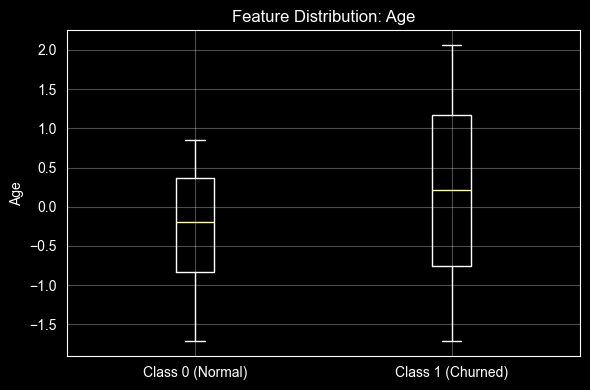

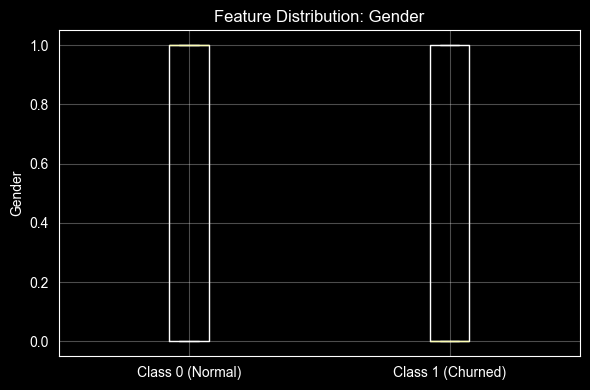

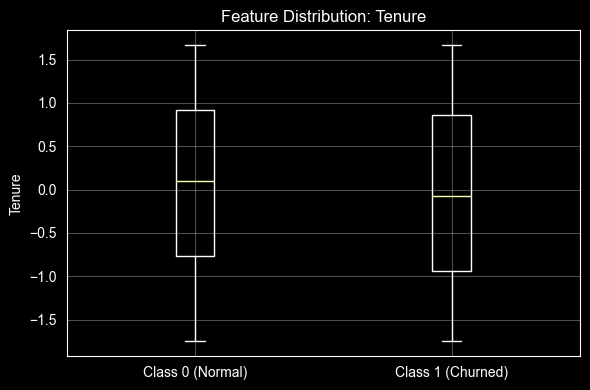

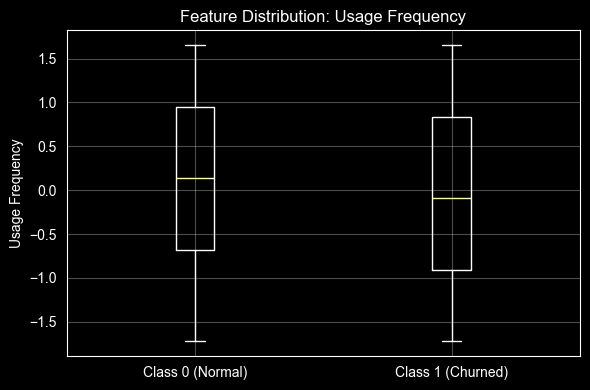

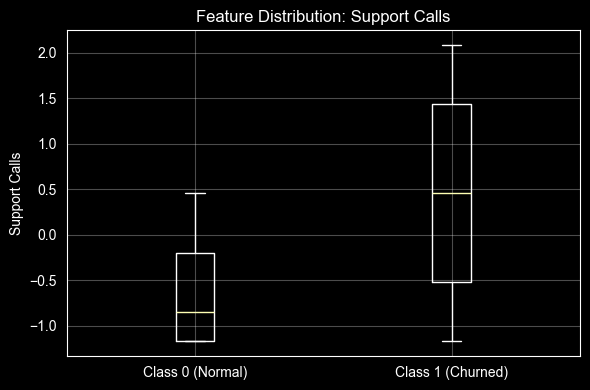

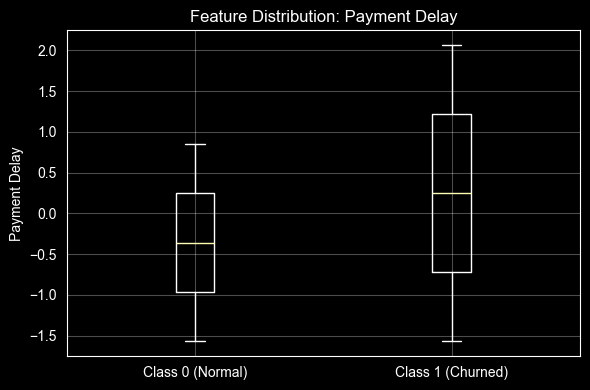

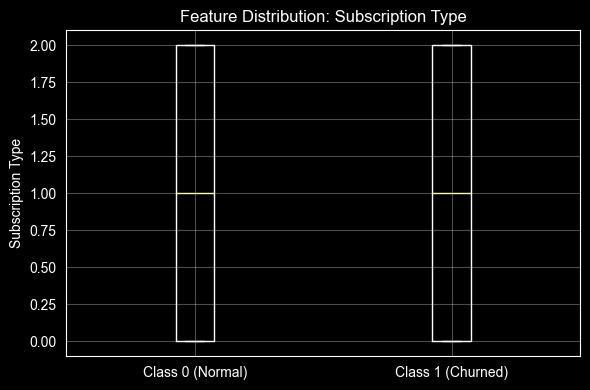

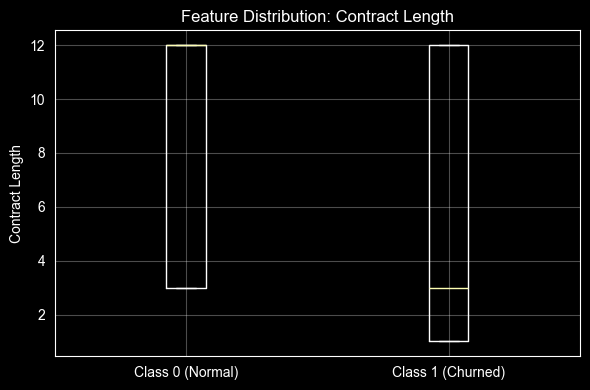

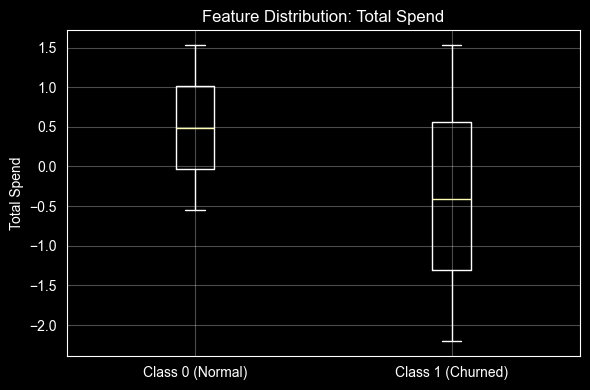

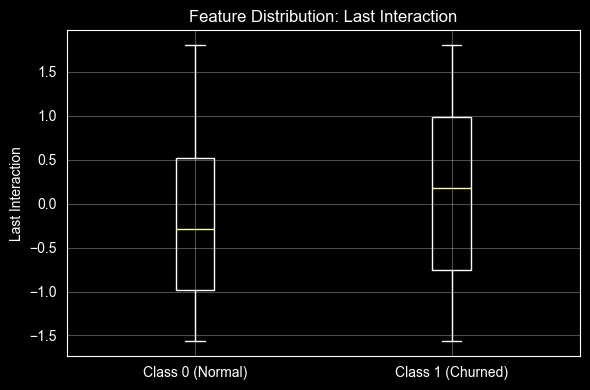

In [27]:
import matplotlib.pyplot as plt

for feature in feature_columns:
    data_0 = df_train_StandardScaled[df_train_StandardScaled[target_column] == 0][feature]
    data_1 = df_train_StandardScaled[df_train_StandardScaled[target_column] == 1][feature]

    plt.figure(figsize=(6, 4))
    plt.boxplot(
        [data_0, data_1],
        tick_labels=["Class 0 (Normal)", "Class 1 (Churned)"],
        showfliers=True
    )
    plt.title(f"Feature Distribution: {feature}")
    plt.ylabel(feature)
    plt.grid(alpha=0.3)


    plt.tight_layout()

    plt.show()


It appears that most of the columns have overlapping features in both target values (0 and 1). Some of the feature columns that show distinctive signatures for the Churn target are: "Age", "Support Calls", "Payment Delay", and "Total Spend"


### B. Pearson's Correlation Matrix Plot

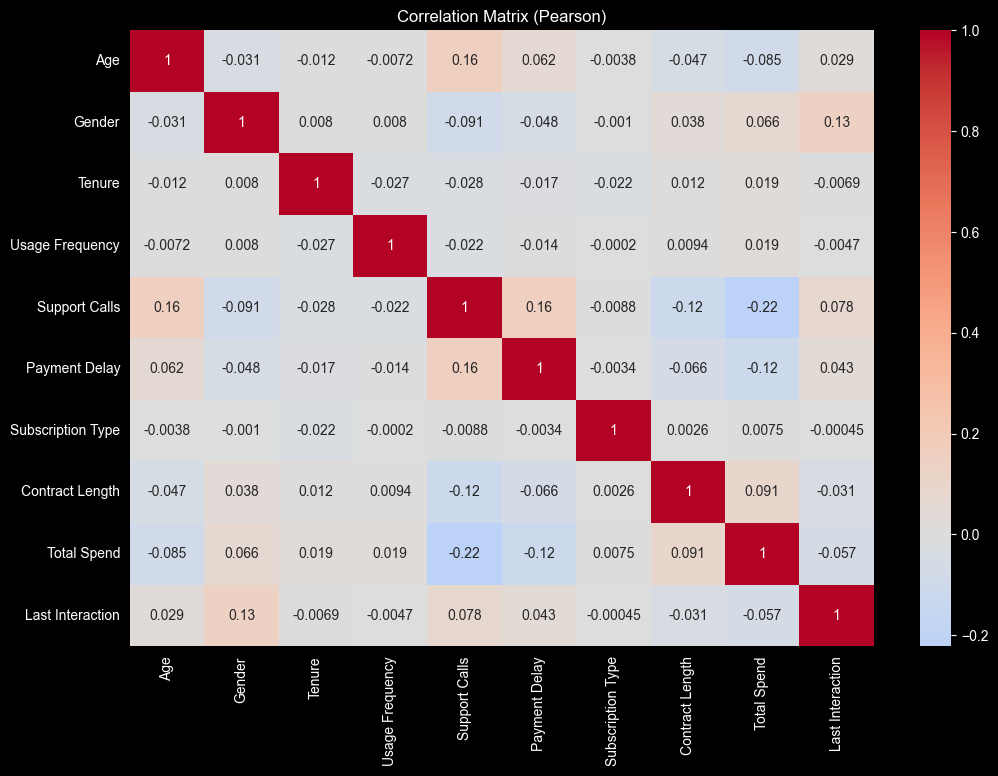

Features with correlation < 0.5 with all others:
['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend', 'Last Interaction']


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df_train_StandardScaled[feature_columns].corr(method="pearson")

# heatmap visualization
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix (Pearson)")
plt.show()

threshold = 0.5
# features with correlation coefficients < threshold
low_corr_features = []
for col in corr_matrix.columns:
    max_corr = corr_matrix[col].drop(col).abs().max()
    if max_corr < threshold:
        low_corr_features.append(col)

print(f"Features with correlation < {threshold} with all others:")
print(low_corr_features)

All 10 features are lowly correlated to each other

### C. Random Forest Classifier Gini Feature Importance Analysis

In [31]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# ===============================
# Prepare X and y
# ===============================

X = df_train_StandardScaled[feature_columns]
y = df_train_StandardScaled[target_column]

# ===============================
# Train Random Forest
# ===============================
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced"
)

rf.fit(X, y)

# ===============================
# Feature importance dataframe
# ===============================
feat_importance = pd.DataFrame({
    "feature": X.columns,
    "importance": rf.feature_importances_
}).sort_values(by="importance", ascending=False)


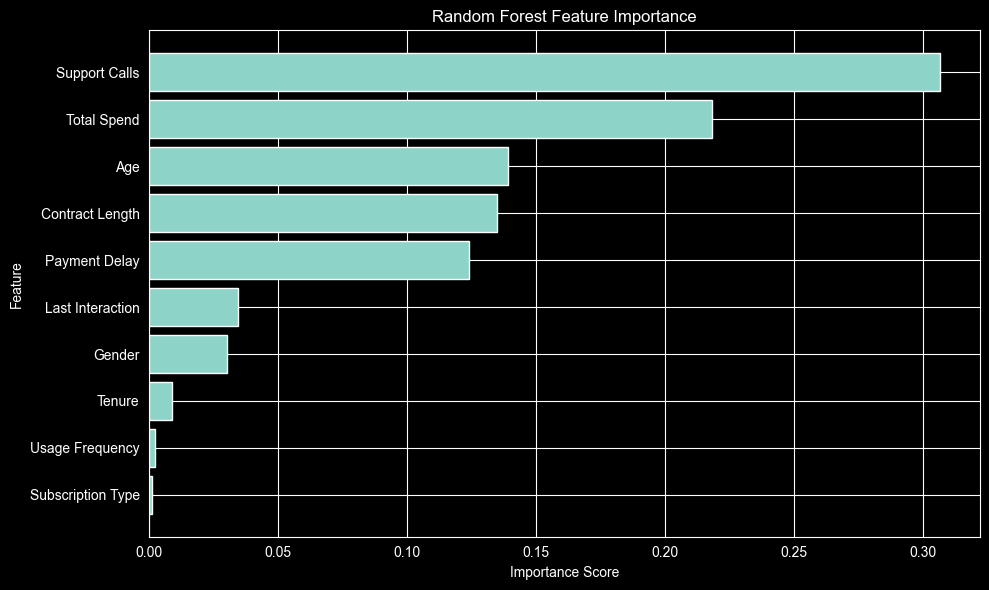

In [32]:
plt.figure(figsize=(10, 6))

plt.barh(
    feat_importance["feature"],
    feat_importance["importance"]
)

plt.gca().invert_yaxis()
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")

plt.tight_layout()
plt.show()


Similar to the boxplot feature analysis results, the 5 most significantly contributing features for the churn prediction are "Age", "Support Calls", "Payment Delay", and "Total Spend".

In [33]:
# save the 5 most important features

important_features = ["Age", "Support Calls", "Payment Delay", "Total Spend"]

imp_feats = {"Important Features": important_features}
joblib.dump(imp_feats, "Artifacts/important_features.pkl")

['Artifacts/important_features.pkl']